In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [3]:
# Load the dataset
data = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
print(data.head())


   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [4]:
# Check the shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# Check for missing values
print(data.isnull().sum())

# Get a summary of the dataset
print(data.info())


Dataset contains 303 rows and 14 columns.
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), 

In [5]:
# Summary statistics of the dataset
print(data.describe())


              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

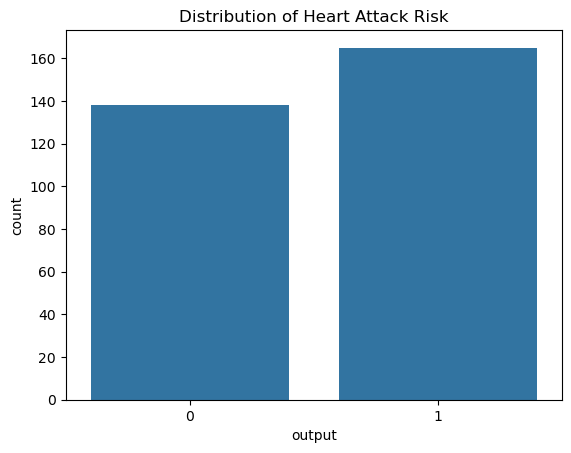

In [6]:
# Plot the distribution of the target variable
sns.countplot(x='output', data=data)
plt.title('Distribution of Heart Attack Risk')
plt.show()

In [7]:
# Rename the columns
data = data.rename(columns={
    'exang': 'exercise_induced_angina',
    'ca': 'num_major_vessels',
    'cp': 'chest_pain_type',
    'trtbps': 'resting_bp',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_ecg',
    'thalach': 'thal',
    'output': 'target'
})

# Verify the changes
print(data.columns)


Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'thalachh', 'exng', 'oldpeak',
       'slp', 'caa', 'thall', 'target'],
      dtype='object')


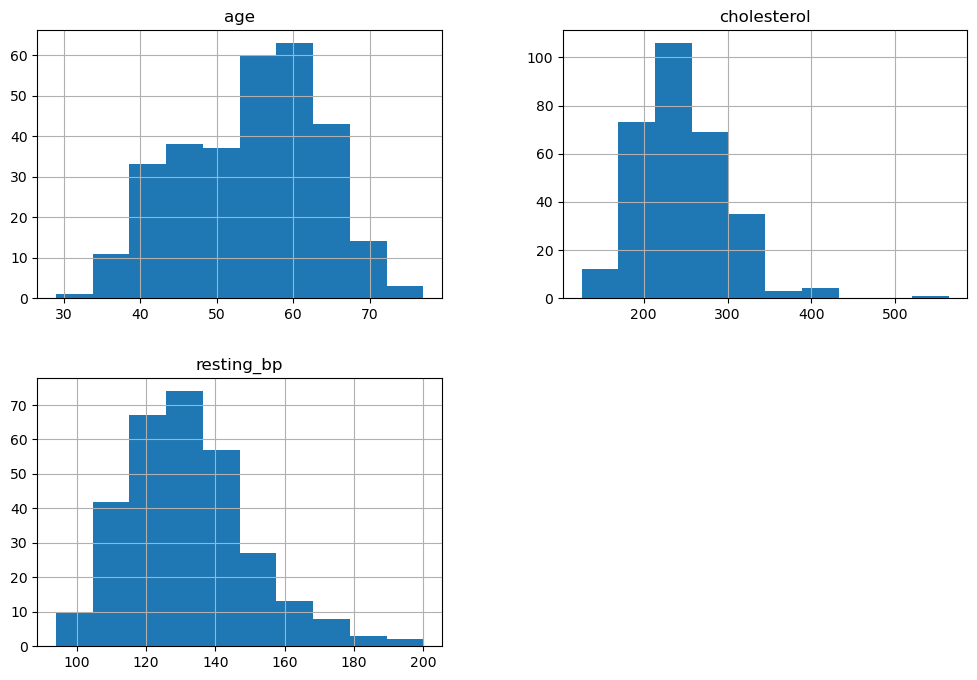

In [9]:
# Histograms of continuous features
data.hist(['age', 'cholesterol', 'resting_bp'], figsize=(12, 8))
plt.show()


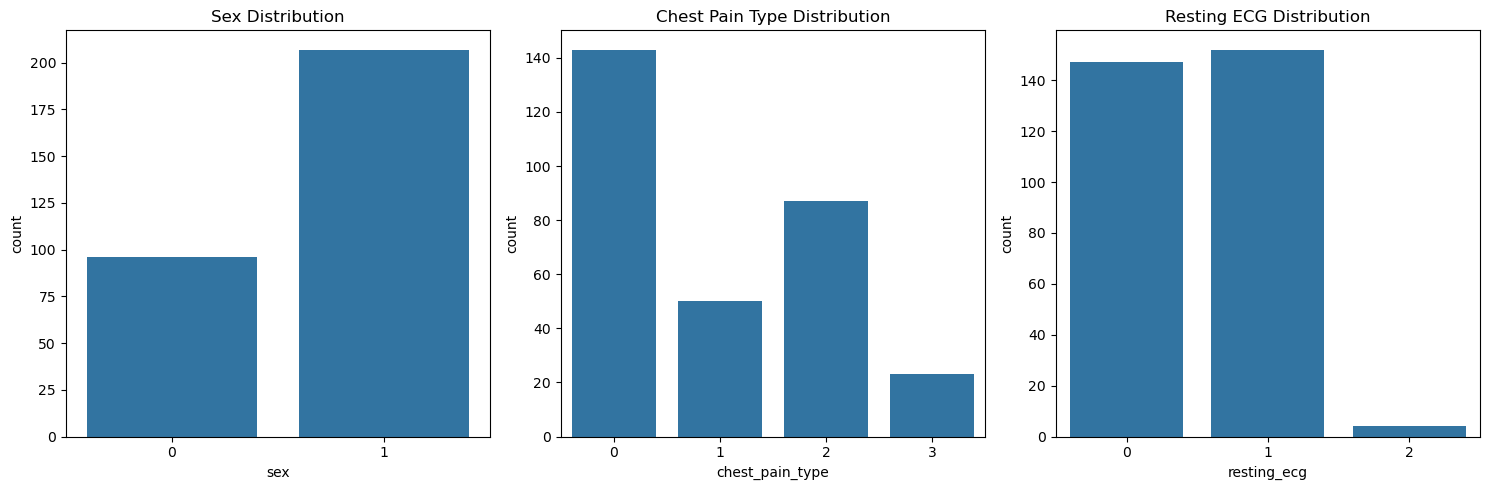

In [10]:
# Plotting categorical features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='sex', data=data, ax=axes[0])
sns.countplot(x='chest_pain_type', data=data, ax=axes[1])
sns.countplot(x='resting_ecg', data=data, ax=axes[2])

axes[0].set_title('Sex Distribution')
axes[1].set_title('Chest Pain Type Distribution')
axes[2].set_title('Resting ECG Distribution')

plt.tight_layout()
plt.show()


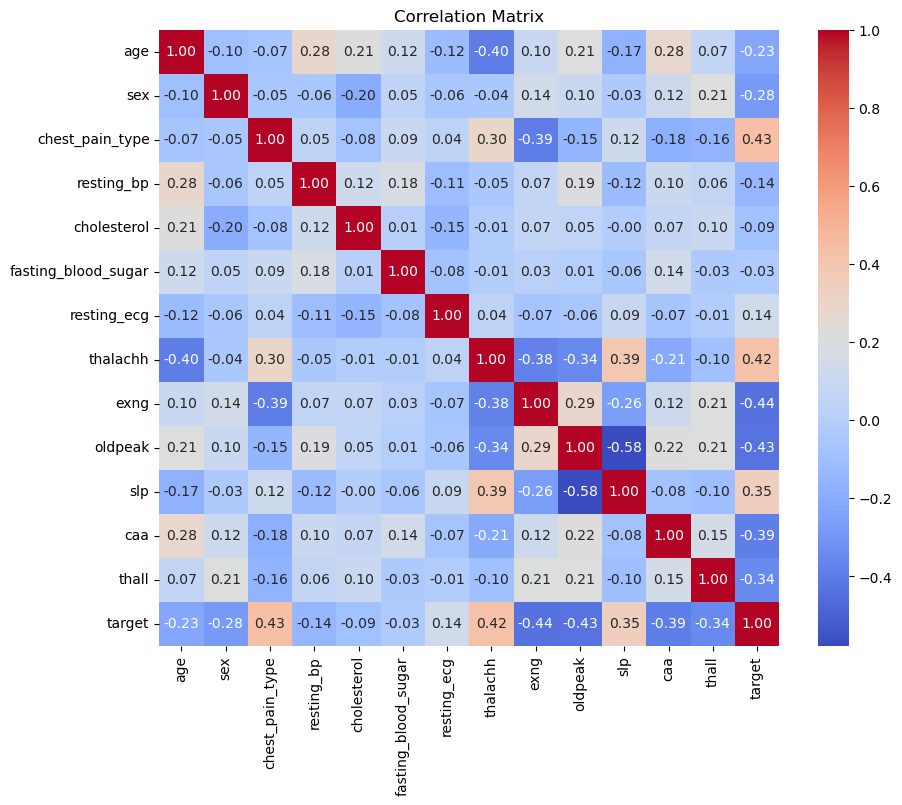

In [11]:
# Correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


In [12]:
# Convert categorical features to numerical 
label_encoders = {}
for column in ['sex', 'chest_pain_type', 'resting_ecg']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each model
accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy:.2f}')

# Display model accuracies
print("\nModel Accuracies:")
for model_name, accuracy in accuracies.items():
    print(f'{model_name}: {accuracy:.2f}')


Logistic Regression Accuracy: 0.85
Random Forest Accuracy: 0.84
Support Vector Machine Accuracy: 0.87
K-Nearest Neighbors Accuracy: 0.90

Model Accuracies:
Logistic Regression: 0.85
Random Forest: 0.84
Support Vector Machine: 0.87
K-Nearest Neighbors: 0.90
